In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz
from tqdm import tqdm

%run utils.ipynb


## Metrics 
**F1 Score** is the harmonic mean of these two measures:
**precision** - share of predicted positives that were positves
**recall** - share of predicted positives over the actual number of postives

In [10]:
df = testimon_fraud()

# Consider transactions of type TRANSFER and amount > 200k to be fraud (heuristics)
df['Fraud_Heuristic '] = np.where(((df['type'] == 'TRANSFER') &(df['amount'] > 200000)),1,0)


from sklearn.metrics import f1_score
f1_score(y_pred=df['Fraud_Heuristic '],y_true=df['isFraud'])
# f1_score range from 0 (worst) to 1 (best)

0.013131315551742895

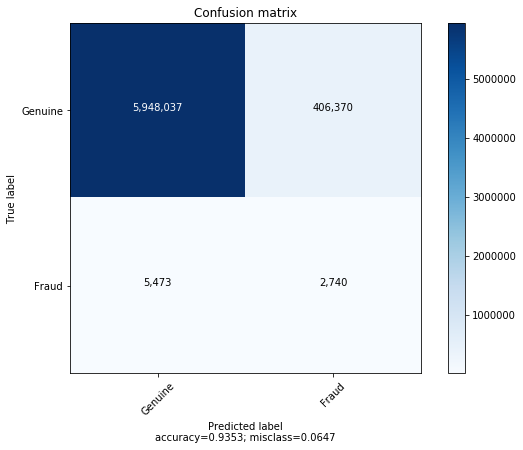

In [16]:
# Evaluate using confusion matrix
from sklearn.metrics import confusion_matrix 


cm = confusion_matrix(
    y_pred=df['Fraud_Heuristic '],y_true=df['isFraud']) 
plot_confusion_matrix(cm,['Genuine','Fraud'], normalize=False)

# Only 2740 out of 5473 fraud cases were detected